In [1]:
import numpy as np
from signalprocessing.filter_artifacts import PreProcessing
import matplotlib.pyplot as plt

%matplotlib inline

## Dummy code to evaluate edge effects

Here we consider plot the sum of two sin functions, and we use the **signalprocessing** module to remove powerline effects. We sum three different contributes, two sinusoidal functions corresponding to the harmonics and one which should not be filtered out.

In [14]:
fs = 1000.
t = np.arange(2000) * (1 / fs)
f1 = 50.
f2 = 8.
f3 = 300.
x = np.cos(2*np.pi * t * f1) + np.cos(2*np.pi * t * f2) + np.cos(2*np.pi * t * f3)

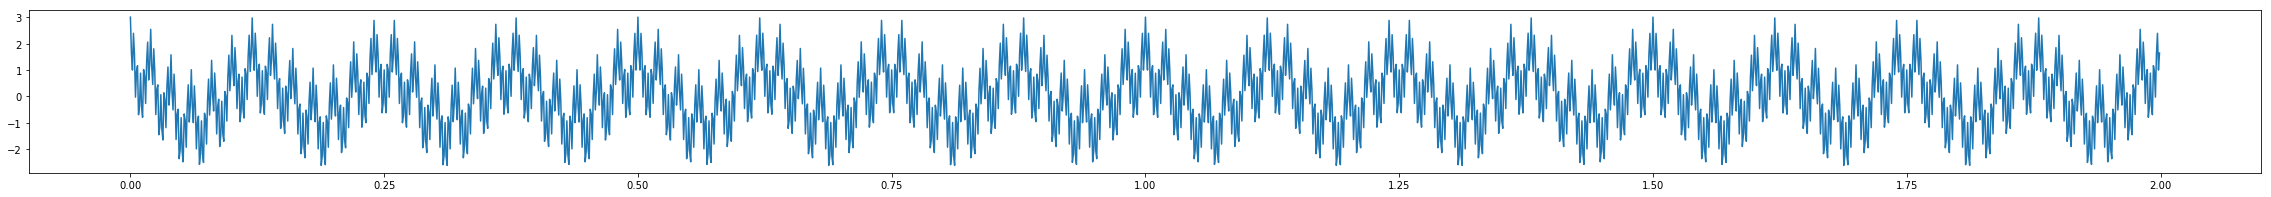

In [15]:
plt.figure(figsize=(40, 3))

plt.plot(t,x);

In [16]:
y = np.cos(2*np.pi * t * f2)

pp = PreProcessing(fs)
filt50 = pp.remove_powerline(x)

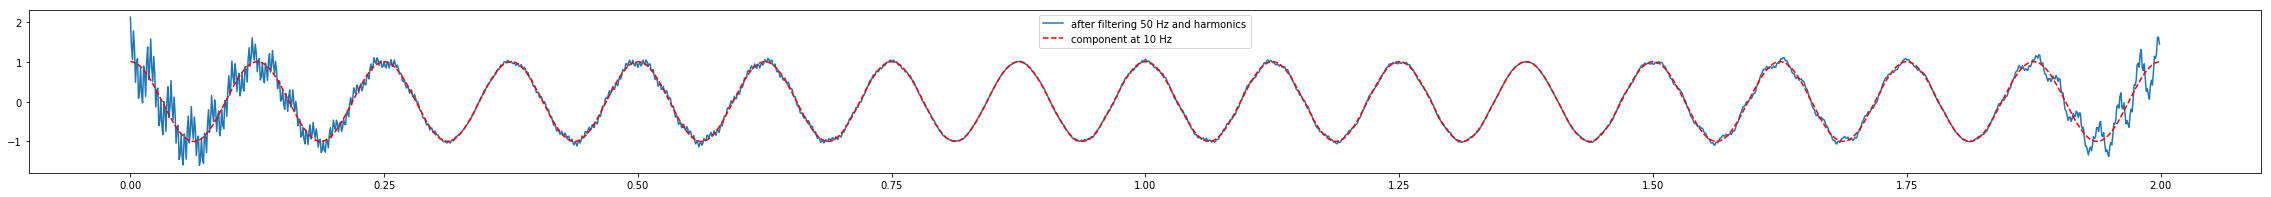

In [17]:
plt.figure(figsize=(40, 3))

plt.plot(t, filt50, label="after filtering 50 Hz and harmonics");
plt.plot(t, y, "--r", label="component at 10 Hz");
plt.legend();

The second signal corresponds to the time series after filtering. We notice that the edge effects are equivalent to the first 0.25 seconds. The filter has a bandwidth of 2 Hz. This corresponds to a period of 0.5 seconds. Approximately we see that the filter capacity is compromised for 0.20 seconds on both sides. If we cut a time window equivalent to the inverse of the filter we are quite safe. In particular, given that we are using a bandstop filter we have

$$\mathcal{F}(\text{bandstop})= \int_{-\omega^*}^{+\omega^*} \exp[i\omega t] d\omega = 2\frac{\sin(\omega^*t)}{t} $$

We are using a Butterworth filter of band 2 Hz. If we compare numerator and denominator in the formula we get that the term is negligible as we increase $t$. The linear function in t is greater than the sinusoidal one already at $2 \pi$. This corresponds, given the frequency. Given that we have $\omega^*$ we must ask
$$ \sin(\omega^* t) \ll t $$
for what $t$ this condition is realized. $t=0.25 s$ is a good approx